In [5]:
import pandas as pd
import numpy as np
from numpy import log
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
csv_data = pd.read_csv('C:/Users/暴脾气の尧/Desktop/#TUM 2 SEMESTER/Applied Machine Intelligence/elec_forecast.csv')
#C:/Users/U388316/OneDrive - Danfoss/Desktop/usb_tum/ami/Han-20210616T220428Z-001/Han/elec_forecast.csv
csv_data.head()

,Date,Time of day,Biomass[MWh],Hydropower[MWh],Wind offshore[MWh],Wind onshore[MWh],Photovoltaics[MWh],Other renewable[MWh],Nuclear[MWh],Fossil brown coal[MWh],...,Residual load[MWh],Lufttemp.+200cm,Lufttemp.+20cm,Bodentemp.-5cm,Bodentemp.-20cm,Luftfeuchtigkeit+200cm,Windgeschw.+250cm,Niederschlag,Globalstrahlg.+200cm,Spot price
0,2015/1/1,0,1006.25,289.75,129.25,2032.00,0.0,33.00,2677.75,3922.00,...,1380.75,2.9,2.0,3.1,3.4,100.0,1.5,0.0,39.0,25.02
1,2015/1/1,1,995.75,297.00,129.00,2074.25,0.0,30.75,2771.50,3830.75,...,1229.75,2.9,2.0,3.1,3.4,100.0,1.5,0.0,39.0,18.29
2,2015/1/1,2,1005.00,284.75,128.50,2135.25,0.0,23.50,2756.50,3704.50,...,1126.25,2.9,2.0,3.1,3.4,100.0,1.5,0.0,39.0,16.04
3,2015/1/1,3,1010.50,280.50,129.75,2138.25,0.0,22.00,2757.00,3518.75,...,1141.00,2.9,2.0,3.1,3.4,100.0,1.5,0.0,39.0,14.60
4,2015/1/1,4,1009.75,278.00,130.00,2161.00,0.0,22.00,2740.75,3529.00,...,1170.25,2.9,2.0,3.1,3.4,100.0,1.5,0.0,39.0,14.95


In [7]:
csv_data.dtypes == 'object'

Date                          True
Time of day                  False
Biomass[MWh]                 False
Hydropower[MWh]              False
Wind offshore[MWh]           False
Wind onshore[MWh]            False
Photovoltaics[MWh]           False
Other renewable[MWh]         False
Nuclear[MWh]                 False
Fossil brown coal[MWh]       False
Fossil hard coal[MWh]        False
Fossil gas[MWh]              False
Hydro pumped storage[MWh]    False
Other conventional[MWh]      False
Total[MWh]                   False
Residual load[MWh]           False
Lufttemp.+200cm              False
Lufttemp.+20cm               False
Bodentemp.-5cm               False
Bodentemp.-20cm              False
Luftfeuchtigkeit+200cm       False
Windgeschw.+250cm            False
Niederschlag                 False
Globalstrahlg.+200cm         False
Spot price                   False
dtype: bool

In [8]:
csv_data.isnull().sum()

Date                            0
Time of day                     0
Biomass[MWh]                   96
Hydropower[MWh]                96
Wind offshore[MWh]             76
Wind onshore[MWh]              77
Photovoltaics[MWh]            100
Other renewable[MWh]           96
Nuclear[MWh]                   96
Fossil brown coal[MWh]         72
Fossil hard coal[MWh]          96
Fossil gas[MWh]                96
Hydro pumped storage[MWh]      96
Other conventional[MWh]        96
Total[MWh]                      0
Residual load[MWh]           1690
Lufttemp.+200cm               720
Lufttemp.+20cm                720
Bodentemp.-5cm                720
Bodentemp.-20cm               720
Luftfeuchtigkeit+200cm        720
Windgeschw.+250cm             720
Niederschlag                  720
Globalstrahlg.+200cm          720
Spot price                      0
dtype: int64

Precharge Top Absolute Correlations
Lufttemp.+200cm  Lufttemp.+20cm          0.999716
Bodentemp.-5cm   Bodentemp.-20cm         0.999263
Lufttemp.+200cm  Bodentemp.-20cm         0.995002
Lufttemp.+20cm   Bodentemp.-20cm         0.993970
Lufttemp.+200cm  Bodentemp.-5cm          0.993381
Lufttemp.+20cm   Bodentemp.-5cm          0.991493
Lufttemp.+200cm  Globalstrahlg.+200cm    0.954796
Lufttemp.+20cm   Globalstrahlg.+200cm    0.954112
Bodentemp.-5cm   Globalstrahlg.+200cm    0.949073
Bodentemp.-20cm  Globalstrahlg.+200cm    0.947917
dtype: float64


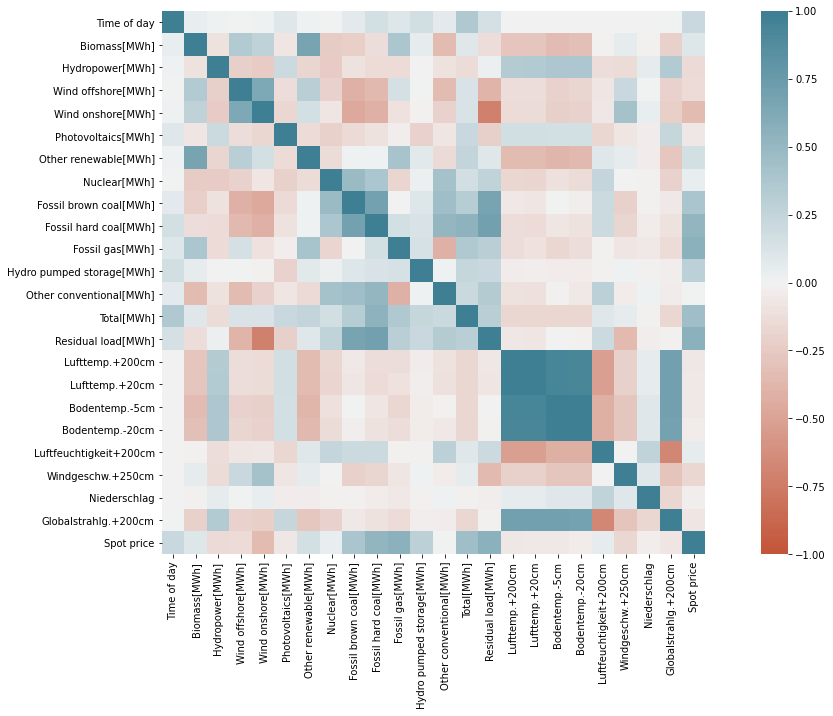

In [9]:
def plot_correlation_matrix(corr_mat):
    plt.figure(figsize=(20,10))
    ax = sns.heatmap(
        corr_mat2, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        )

# Correlation in Percentage
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

corr_mat2 = csv_data.corr(method='pearson')
plot_correlation_matrix(corr_mat2)

print("Precharge Top Absolute Correlations")
print(get_top_abs_correlations(corr_mat2, 10))

# Erase features that have low correlation with labels

'Photovoltaics[MWh]',
'Nuclear[MWh]',
'Other conventional[MWh]',
'Lufttemp.+200cm',
'Lufttemp.+20cm',
'Bodentemp.-5cm',
'Bodentemp.-20cm',
'Luftfeuchtigkeit+200cm',
'Niederschlag',
'Globalstrahlg.+200cm'

In [10]:
csv_data =csv_data.drop(['Photovoltaics[MWh]','Nuclear[MWh]','Other conventional[MWh]','Lufttemp.+200cm','Lufttemp.+20cm','Bodentemp.-5cm','Bodentemp.-20cm','Luftfeuchtigkeit+200cm','Niederschlag','Globalstrahlg.+200cm'],axis=1)

In [11]:
corr_mat2 = csv_data.corr(method='pearson')
print("Precharge Top Absolute Correlations")
print(get_top_abs_correlations(corr_mat2, 10))

Precharge Top Absolute Correlations
Wind onshore[MWh]       Residual load[MWh]        0.949825
Fossil brown coal[MWh]  Fossil hard coal[MWh]     0.946792
Fossil hard coal[MWh]   Residual load[MWh]        0.924877
Fossil brown coal[MWh]  Residual load[MWh]        0.921535
Wind offshore[MWh]      Wind onshore[MWh]         0.912012
Biomass[MWh]            Other renewable[MWh]      0.864453
Wind onshore[MWh]       Fossil brown coal[MWh]    0.850273
Residual load[MWh]      Spot price                0.845680
Wind offshore[MWh]      Residual load[MWh]        0.845599
                        Fossil brown coal[MWh]    0.845098
dtype: float64


# Erase features that have high correlation with features

remove Wind onshore[MWh], since Residual load[MWh] has higher correlation with labels;
remove Fossil brown coal[MWh], since Fossil hard coal[MWh] has higher correlation with labels;
remove Biomass[MWh], since Other renewable[MWh] has higher correlation with labels.

In [12]:
csv_data =csv_data.drop(['Wind onshore[MWh]','Fossil brown coal[MWh]','Biomass[MWh]'],axis=1)

In [13]:
corr_mat2 = csv_data.corr(method='pearson')
print("Precharge Top Absolute Correlations")
print(get_top_abs_correlations(corr_mat2, 10))

Precharge Top Absolute Correlations
Fossil hard coal[MWh]  Residual load[MWh]       0.904479
Residual load[MWh]     Spot price               0.811561
Wind offshore[MWh]     Residual load[MWh]       0.784913
Fossil hard coal[MWh]  Spot price               0.780913
Residual load[MWh]     Windgeschw.+250cm        0.758139
Wind offshore[MWh]     Fossil hard coal[MWh]    0.716142
Fossil hard coal[MWh]  Total[MWh]               0.682619
Fossil gas[MWh]        Spot price               0.680999
Total[MWh]             Spot price               0.629702
Windgeschw.+250cm      Spot price               0.587639
dtype: float64


# Erase features that have high correlation with features

remove Fossil hard coal[MWh], since Residual load[MWh] has higher correlation with labels;
remove Wind offshore[MWh], since Residual load[MWh] has higher correlation with labels;
remove Windgeschw.+250cm, since Residual load[MWh] has higher correlation with labels.

In [14]:
csv_data =csv_data.drop(['Fossil hard coal[MWh]','Wind offshore[MWh]','Windgeschw.+250cm'],axis=1)

In [15]:
corr_mat2 = csv_data.corr(method='pearson')
print("Precharge Top Absolute Correlations")
print(get_top_abs_correlations(corr_mat2, 10))

Precharge Top Absolute Correlations
Hydropower[MWh]       Fossil gas[MWh]         0.680120
Residual load[MWh]    Spot price              0.679945
Hydropower[MWh]       Total[MWh]              0.675624
Fossil gas[MWh]       Spot price              0.673955
Hydropower[MWh]       Spot price              0.665802
                      Other renewable[MWh]    0.582664
Total[MWh]            Spot price              0.523266
Other renewable[MWh]  Fossil gas[MWh]         0.505115
Fossil gas[MWh]       Total[MWh]              0.402285
Hydropower[MWh]       Residual load[MWh]      0.322693
dtype: float64


# Erase features that have high correlation with features

remove Hydropower[MWh], since Fossil gas[MWh] has higher correlation with labels;
remove Other renewable[MWh], since Fossil gas[MWh] has higher correlation with labels;
tho Fossil gas[MWh] and Total[MWh] are correlated (40%), both have higher correlation to labels (57%, 47%),
Keep these bitches for a moment.

In [16]:
csv_data =csv_data.drop(['Hydropower[MWh]','Other renewable[MWh]'],axis=1)

In [17]:
corr_mat2 = csv_data.corr(method='pearson')
print("Precharge Top Absolute Correlations")
print(get_top_abs_correlations(corr_mat2, 10))

Precharge Top Absolute Correlations
Fossil gas[MWh]            Spot price                   0.545229
Time of day                Fossil gas[MWh]              0.525364
Residual load[MWh]         Spot price                   0.514233
Time of day                Spot price                   0.511216
                           Residual load[MWh]           0.467991
Fossil gas[MWh]            Hydro pumped storage[MWh]    0.421099
Hydro pumped storage[MWh]  Total[MWh]                   0.349078
                           Spot price                   0.285536
Time of day                Hydro pumped storage[MWh]    0.267546
Hydro pumped storage[MWh]  Residual load[MWh]           0.250742
dtype: float64


# Erase features that have high correlation with features

remove Hydro pumped storage[MWh], since it is with low correlation to labels and Fossil gas[MWh] has higher correlation with labels.

In [18]:
csv_data =csv_data.drop(['Hydro pumped storage[MWh]'],axis=1)

In [19]:
corr_mat2 = csv_data.corr(method='pearson')
print("Precharge Top Absolute Correlations")
print(get_top_abs_correlations(corr_mat2, 10))

Precharge Top Absolute Correlations
Time of day         Fossil gas[MWh]       0.691456
                    Spot price            0.675316
                    Residual load[MWh]    0.587737
Fossil gas[MWh]     Spot price            0.461284
Residual load[MWh]  Spot price            0.446594
Total[MWh]          Residual load[MWh]    0.307261
Fossil gas[MWh]     Total[MWh]            0.118605
Total[MWh]          Spot price            0.092792
Fossil gas[MWh]     Residual load[MWh]    0.085444
Time of day         Total[MWh]            0.009232
dtype: float64


# Erase features that have high correlation with features

remove Total[MWh] , since it is with low correlation to labels and Residual load[MWh] has higher correlation with labels.

In [20]:
csv_data =csv_data.drop(['Total[MWh]'],axis=1)

In [21]:
corr_mat2 = csv_data.corr(method='pearson')
print("Precharge Top Absolute Correlations")
print(get_top_abs_correlations(corr_mat2, 10))

Precharge Top Absolute Correlations
Time of day         Fossil gas[MWh]       0.702083
                    Spot price            0.692335
                    Residual load[MWh]    0.609333
Fossil gas[MWh]     Spot price            0.442057
Residual load[MWh]  Spot price            0.415144
Fossil gas[MWh]     Residual load[MWh]    0.134146
dtype: float64


Therefore, we have three features

namely,
'Time of day ';
'Fossil gas[MWh] ';
'Residual load[MWh]'

First, 'Residual load[MWh]' has low correlation with other features while it has middle correlation to labels 
so definitely keep 'Residual load[MWh]';

Second, 'Time of day' has high correlation with 'Fossil gas[MWh]', and 'Time of day' has highest correlation with labels;
so definitely keep 'Time of day'.




# IMPROVEMENT 1: we can try later if remove 'Fossil gas[MWh]' can improve accuracy.